In [26]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import glob, os

In [27]:
# 앨범 이미지를 불러와서 시대별로 나누기
# 1990년대 : 0
# 2000년대 : 1
# 2010년대 : 2

# 일부 이미지 3채널이 아니라 1채널(GrayScale)임
# 우선
filepath = './album/'
imgList = glob.glob(filepath+"*")
yearLabel = {'9': 0,
             '0': 1,
             '1': 2}

imgdata = []
eraLabel = []

for path_ in imgList:
    img = Image.open(path_)

    # RGB 일 때
    img = np.array(img).reshape(-1)
    if len(img) == 6912:
        imgdata.append(img)

        era = path_.split('/')[-1].split('_')[1][2]
        eraLabel.append(yearLabel[era])

    # # gray scale 일 때 사용
    # img = img.convert('L')
    # img = np.array(img).reshape(-1)
    # if len(img) == 2304:
    #     imgdata.append(img)
    #     era = path_.split('/')[-1].split('_')[1][2]
    #     eraLabel.append(yearLabel[era])


imgdata = np.array(imgdata)
eraLabel = np.array(eraLabel)

In [28]:
imgdata.shape, eraLabel.shape

((2937, 6912), (2937,))

### DNN 모델링

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization,Activation,LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.utils import to_categorical
from keras.utils import plot_model

In [30]:
# 정규화 및 원핫인코딩
imgdata = imgdata.astype('float32')/255.0
eraLabel = to_categorical(eraLabel)

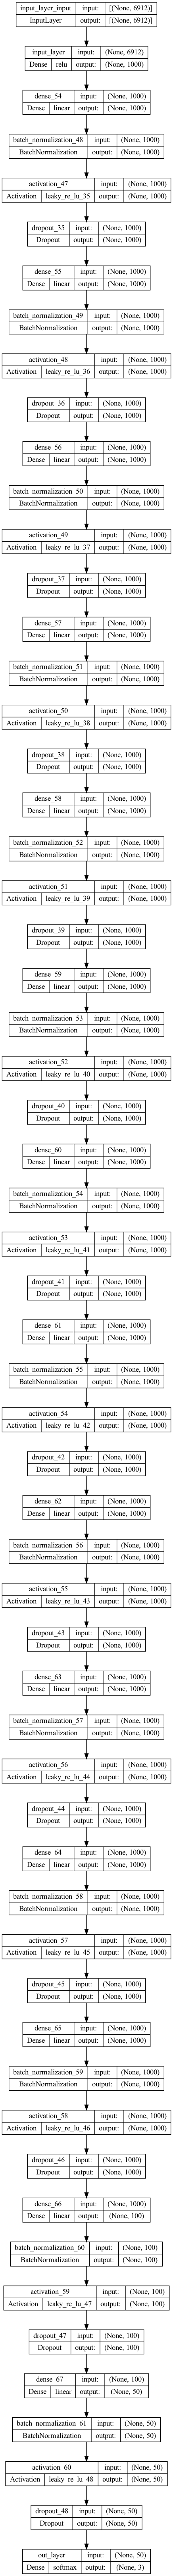

In [43]:
# 모델 생성
folderpath = './models/'
if not os.path.exists(folderpath):
    os.makedirs(folderpath)
    print('models 폴더 생성 완료')

dnn = Sequential(name='DNN_basic')
dnn.add(Dense(1000,input_dim=6912,kernel_initializer='he_uniform',activation='relu',name='input_layer'))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))

dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))

dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))
dnn.add(Dense(1000,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))



dnn.add(Dense(100,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))

dnn.add(Dense(50,kernel_initializer='he_uniform',kernel_regularizer='L1L2'))
dnn.add(BatchNormalization())
dnn.add(Activation(LeakyReLU()))
dnn.add(Dropout(0.5))


dnn.add(Dense(3,activation='softmax',name='out_layer'))

plot_model(dnn,to_file=f'{folderpath}{dnn.name}.png',show_layer_names=True,show_layer_activations=True,show_shapes=True)

Epoch 1/100
147/147 [==============================] - ETA: 0s - loss: 0.7608 - accuracy: 0.6918
Epoch 1: val_accuracy improved from -inf to 0.46939, saving model to ./models/DNN_basic.hdf5
147/147 [==============================] - 7s 42ms/step - loss: 0.7608 - accuracy: 0.6918 - val_loss: 1.9790 - val_accuracy: 0.4694
Epoch 2/100
147/147 [==============================] - ETA: 0s - loss: 0.7316 - accuracy: 0.7063
Epoch 2: val_accuracy improved from 0.46939 to 0.50340, saving model to ./models/DNN_basic.hdf5
147/147 [==============================] - 6s 41ms/step - loss: 0.7316 - accuracy: 0.7063 - val_loss: 1.6548 - val_accuracy: 0.5034
Epoch 3/100
147/147 [==============================] - ETA: 0s - loss: 0.7354 - accuracy: 0.7156
Epoch 3: val_accuracy did not improve from 0.50340
147/147 [==============================] - 6s 40ms/step - loss: 0.7354 - accuracy: 0.7156 - val_loss: 2.2573 - val_accuracy: 0.4150
Epoch 4/100
147/147 [==============================] - ETA: 0s - loss: 0.

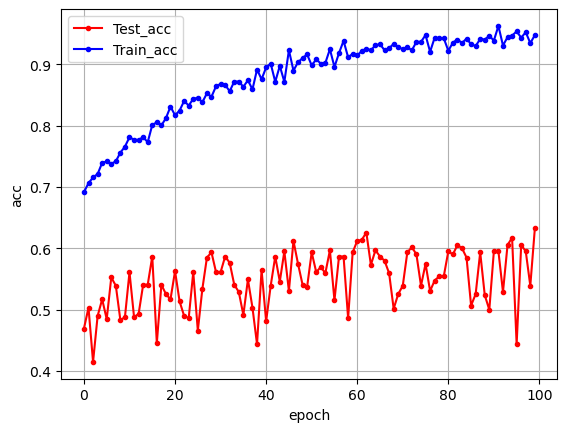

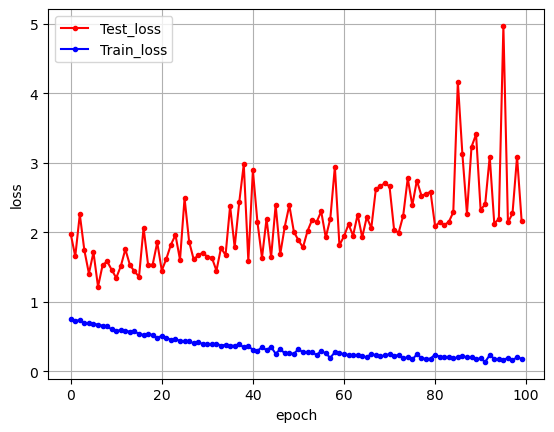

In [46]:
erCB = EarlyStopping(verbose=1,patience=8,monitor='val_accuracy')
mcCB = ModelCheckpoint(folderpath+f"{dnn.name}.hdf5",save_best_only=True,monitor='val_accuracy',verbose=1)
def scheduler(epoch,lr):
    if epoch % 10 == 0:
        return lr * np.math.exp(-0.1)
    else:
        return lr
lrCB = LearningRateScheduler(schedule=scheduler)

dnn.compile(loss='categorical_crossentropy',optimizer='adam',
            metrics=['accuracy'])

history = dnn.fit(imgdata,eraLabel,batch_size=16,epochs=100,
        callbacks=[mcCB],
        validation_split=0.2,
        )



# 검증셋과 학습셋의 오차를 저장
y_vAcc = history.history['val_accuracy']
y_Acc = history.history['accuracy']

# 그래프로 표현해 봅니다
x_len = np.arange(len(y_Acc))
plt.plot(x_len,y_vAcc,marker='.',c='red',label='Test_acc')
plt.plot(x_len,y_Acc,marker='.',c='blue',label='Train_acc')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()


# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다
x_len = np.arange(len(y_Acc))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Test_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

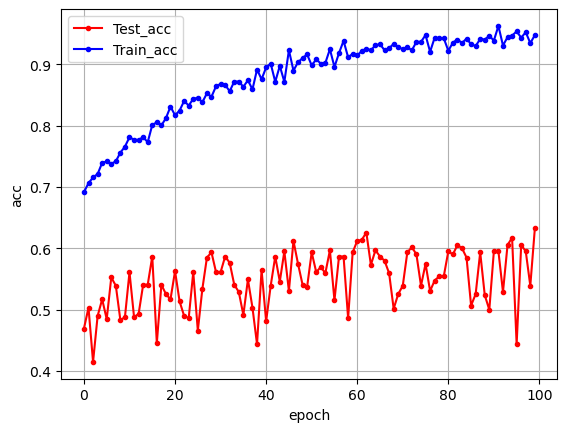

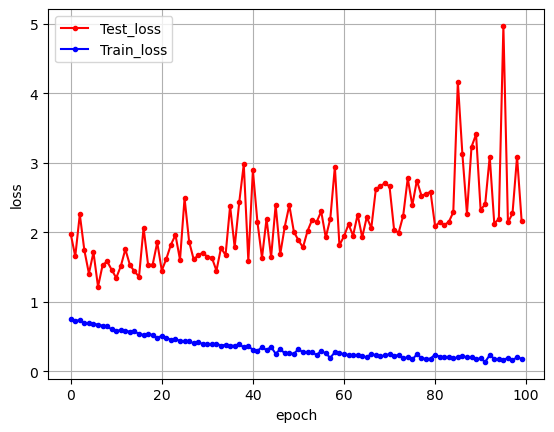

In [48]:
# 검증셋과 학습셋의 오차를 저장
y_vAcc = history.history['val_accuracy']
y_Acc = history.history['accuracy']

# 그래프로 표현해 봅니다
x_len = np.arange(len(y_Acc))
plt.plot(x_len,y_vAcc,marker='.',c='red',label='Test_acc')
plt.plot(x_len,y_Acc,marker='.',c='blue',label='Train_acc')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.savefig(f"image/{dnn.name}_accuracy.jpg")
plt.show()


# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다
x_len = np.arange(len(y_Acc))
plt.plot(x_len,y_vloss,marker='.',c='red',label='Test_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Train_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.savefig(f"image/{dnn.name}_loss.jpg")
plt.show()